In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Data import

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Missing Value Cheak

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Outliers

<AxesSubplot:xlabel='amount'>

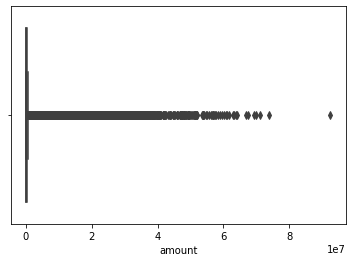

In [8]:
sns.boxplot(x=df["amount"])

# Class imbalance cheak

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

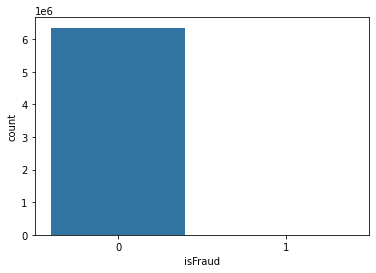

In [10]:
sns.countplot(df['isFraud'])

# Finding Correlation

<AxesSubplot:>

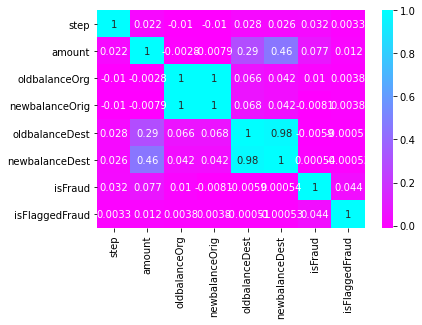

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='cool_r')

# VISUALIZATION

<AxesSubplot:xlabel='type', ylabel='count'>

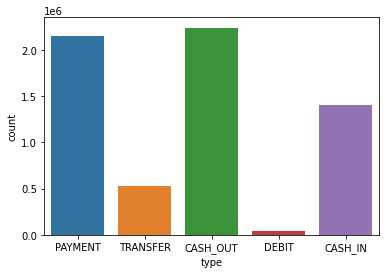

In [12]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='step', ylabel='Density'>

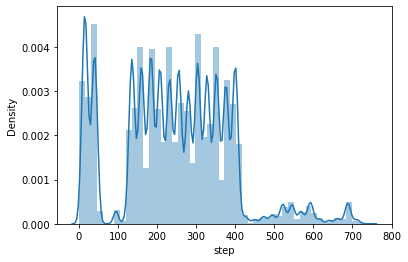

In [13]:
sns.distplot(df['step'])

<AxesSubplot:xlabel='amount', ylabel='Density'>

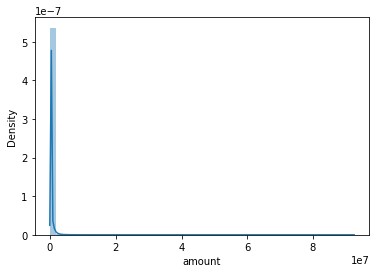

In [14]:
sns.distplot(df['amount'])

<AxesSubplot:xlabel='amount', ylabel='Density'>

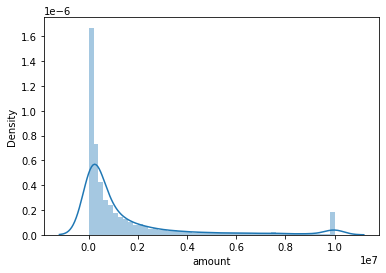

In [15]:
fraud = df[df['isFraud'] == 1]
sns.distplot(fraud['amount'])

In [16]:
df['nameOrig'].nunique()

6353307

In [17]:
df['nameDest'].nunique()

2722362

In [ ]:
observation : 
    (i)No missing values are present
    (ii)Amount Column has outliers
    (iii)This is an imbalanced dataset
    (iv)From the correlation matrix we can see that oldbalanceDest and newbalanceDest has high correlation.within amount and
    oldbalanceDest,newbalanceDest has significant correlation 
    (v)Most frequent payment methods are PAYMENT and CASH_OUT type and smallest is DEBIT type
    (vi) we can see when amount is less then only fraud is present
    (vii)unique values of 'nameOrig' and 'nameDest' is 6353307 and 2722362
    

# Multicolinearity Cheaking

In [18]:
data_without_text=pd.DataFrame({"step":df.step,
                                "amount":df.amount,
                               "oldbalanceOrg":df.oldbalanceOrg,
                               "newbalanceOrig":df.newbalanceOrig,
                               "oldbalanceDest":df.oldbalanceDest,
                               "newbalanceDest":df.newbalanceDest,
                               "isFraud":df.isFraud,
                               "isFlaggedFraud":df.isFlaggedFraud})
vif_data = pd.DataFrame()
vif_data["feature"] = data_without_text.columns
  
vif_data["VIF"] = [variance_inflation_factor(data_without_text.values, i)
                          for i in range(len(data_without_text.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


In [ ]:
Observation:
    issues:
        (i) Here oldbalanceOrg and newbalanceOrig has high VIF value, so multicolinearity present
        (ii) oldbalanceDest and newbalanceDest has also multicolinearity
    prevention:
        (i) we will remove oldbalnceorg and newbalaceorig and add the difference of column in the data set.
        (ii) do the same thing for this also  

In [4]:
from tqdm import tqdm

In [5]:
old_balance=df["oldbalanceOrg"]
new_balance=df["newbalanceOrig"]
bal_change=[] #if balace deduct then 1 else 0
for i in tqdm(range(len(old_balance))):
  diff=new_balance[i]-old_balance[i]
  if diff>0:
      bal_change.append(0)
  else:
      bal_change.append(1)

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:59<00:00, 107180.94it/s]


In [6]:
dest_old=df["oldbalanceDest"]
dest_new=df["newbalanceDest"]
dest_bal_change=[]
dest_bal=[]
for i in tqdm(range(len(dest_old))):
    diff=dest_new[i]-dest_old[i]
    if diff>0:
        dest_bal_change.append(0)
        dest_bal.append(abs(diff))
    else:
        dest_bal_change.append(1)
        dest_bal.append(abs(diff))

100%|█████████████████████████████████████████████████████████████████████| 6362620/6362620 [01:06<00:00, 96286.09it/s]


In [7]:
df["source_bal_change"]=bal_change
df["destination"]=dest_bal
df["dest_bal_chnage"]=dest_bal_change

In [8]:
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [9]:
df.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,1,0.0,1
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,1,0.0,1
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,1,0.0,1
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,1,21182.0,1
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0,1,0.0,1


# DATA TRANSFORMATION

In [10]:
types = pd.get_dummies(df['type'], prefix='type', drop_first=True)
types.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [11]:
df['nameOrig'] = label.fit_transform(df['nameOrig'])
df['nameDest'] = label.fit_transform(df['nameDest'])

In [12]:
df[['nameOrig', 'nameDest']]

,nameOrig,nameDest
0,757869,1662094
1,2188998,1733924
2,1002156,439685
3,5828262,391696
4,3445981,828919
...,...,...
6362615,5651847,505863
6362616,1737278,260949
6362617,533958,108224
6362618,2252932,319713


In [13]:
df = pd.concat([df, types], axis=1)
df = df.drop('type', axis=1)

In [14]:
#Scaling the columns using standard scalar method
#define the columns 
 
cols = ['step','amount','nameOrig','nameDest','destination']
 
#Call the sklearn library and import scaler values 
from sklearn.preprocessing import StandardScaler
 
#call the standard scaler 
std_scaler = StandardScaler()
 
#fit the values to the function 
df[cols] = std_scaler.fit_transform(df[cols])

In [15]:
df

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703042,-0.281560,-1.318825,1.220490,0,0,1,-0.232051,1,0,0,1,0
1,-1.703042,-0.294767,-0.538520,1.316232,0,0,1,-0.232051,1,0,0,1,0
2,-1.703042,-0.297555,-1.185630,-0.408856,1,0,1,-0.232051,1,0,0,0,1
3,-1.703042,-0.297555,1.445742,-0.472820,1,0,1,-0.205610,1,1,0,0,0
4,-1.703042,-0.278532,0.146834,0.109953,0,0,1,-0.232051,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,1.349554,-0.320647,1,0,1,0.191968,0,1,0,0,0
6362616,3.510123,10.153953,-0.784815,-0.647092,1,0,1,-0.232051,1,0,0,0,1
6362617,3.510123,10.153953,-1.440909,-0.850659,1,0,1,7.646375,0,1,0,0,0
6362618,3.510123,1.109765,-0.503661,-0.568766,1,0,1,-0.232051,1,0,0,0,1


In [16]:
# Splitting the data into dependent and independent Features
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Model Fitting

In [ ]:
Here I use Logistic Regression Classifier to classify the Fraud or not

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1270889      28]
 [   1100     507]]


In [ ]:
This model can classify 1270889+507 numbers of right prediction

# Performance Cheaking

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270917
           1       0.95      0.32      0.47      1607

    accuracy                           1.00   1272524
   macro avg       0.97      0.66      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524

